In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

from GPy import models
import GPy

import sobol
import optunity

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss, Conv2d, Sequential, BatchNorm2d
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

from util import train_NN, test_loss, loadMNIST, loadCIFAR10, plot_GPmodel
from HyperparamOptimizer import HyperparamOptimizer

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


## MNIST LeNet

In [3]:
from Models import LeNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadMNIST(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 1, 28, 28)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeNet_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

In [4]:
num_samples = 20
num_iterations = 60

LeNet_optim.get_sobol_samples(num_samples)
LeNet_optim.GPR_optim(num_iterations)
print(LeNet_optim.get_best_parameters())

{'lr': 0.21875, 'momentum': 0.78125, 'p_randomTransform': 0.0625}


In [5]:
with open('models/LeNet/LeNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeNet_optim, file)

In [4]:
with open('models/LeNet/LeNet_optimizer.pkl', 'rb') as file:
    LeNet_optim = pickle.load(file)

In [5]:
LeNet_optim.get_best_parameters()

({'lr': 0.21875, 'momentum': 0.78125, 'p_randomTransform': 0.0625},
 99.70666666666666)

In [6]:
print(LeNet_optim.values)
print(LeNet_optim.points)
print(LeNet_optim.gp_predictions)

[[ 9.23666667]
 [98.91166667]
 [99.275     ]
 [99.56333333]
 [99.215     ]
 [10.21833333]
 [98.65333333]
 [98.19333333]
 [99.645     ]
 [ 9.73666667]
 [98.90166667]
 [99.70666667]
 [98.00166667]
 [11.23666667]
 [97.68166667]
 [97.855     ]
 [95.90333333]
 [10.44166667]
 [99.37      ]
 [99.285     ]
 [98.9       ]
 [97.93666667]
 [99.11166667]
 [ 9.73666667]
 [96.41333333]
 [98.375     ]
 [99.16333333]
 [97.48333333]
 [98.465     ]
 [98.54166667]
 [98.88166667]
 [ 9.87166667]
 [97.495     ]
 [ 9.75166667]
 [99.10833333]
 [ 9.87166667]
 [98.42666667]
 [98.75666667]
 [98.78333333]
 [99.41833333]
 [98.10833333]
 [ 9.75166667]
 [98.54833333]
 [86.09833333]
 [98.56333333]
 [ 9.93      ]
 [99.25833333]
 [99.625     ]
 [96.89333333]
 [52.99666667]
 [96.06833333]
 [99.05833333]
 [94.79      ]
 [99.50666667]
 [98.77833333]
 [95.94833333]
 [98.60666667]
 [98.76666667]
 [97.50666667]
 [89.58833333]
 [99.        ]
 [97.695     ]
 [99.145     ]
 [98.24333333]
 [92.66666667]
 [97.10833333]
 [98.23   

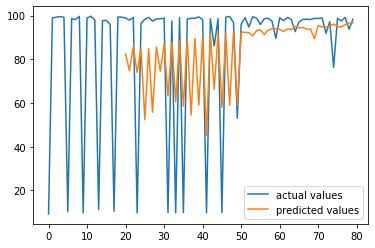

In [7]:
plt.plot(LeNet_optim.values, label = 'actual values')
plt.plot(LeNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

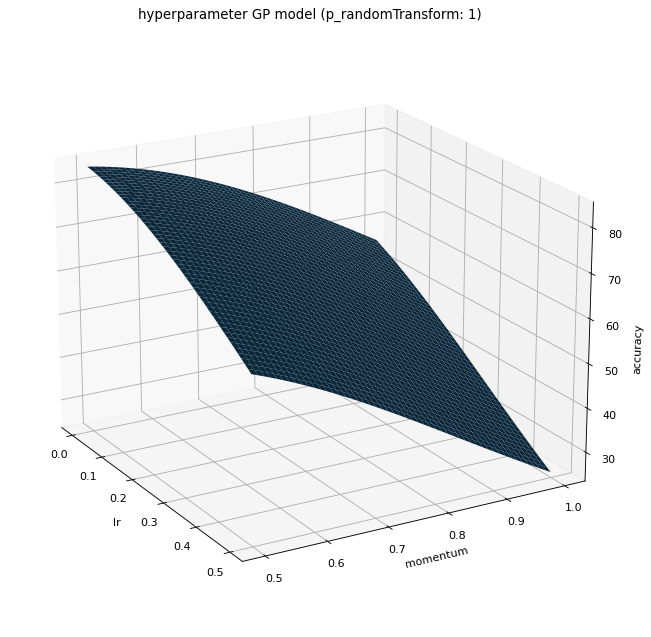

In [8]:
plot_GPmodel(LeNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

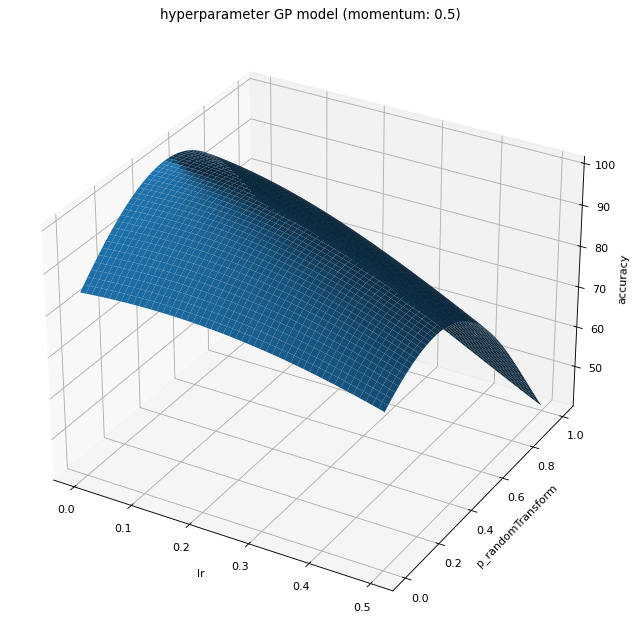

In [9]:
plot_GPmodel(LeNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

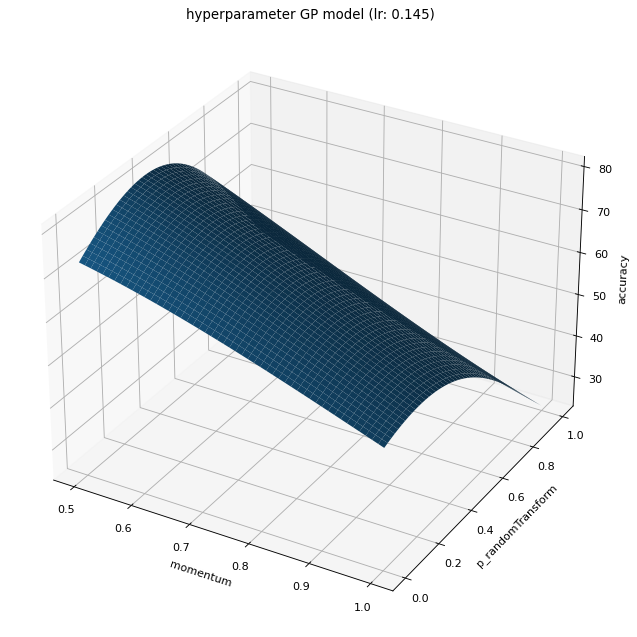

In [10]:
plot_GPmodel(LeNet_optim, "momentum", "p_randomTransform", "lr", 0.145)

## MNIST LeASLNet

In [13]:
from Models import LeASLNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadMNIST(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def ASL_train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 1, 28, 28)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeASLNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0, device=device, expansion_rate=1).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeASLNet_optim = HyperparamOptimizer(
    train_function=ASL_train_function, parameter_range=parameter_range, device=device)

In [14]:
num_samples = 20
num_iterations = 60

LeASLNet_optim.get_sobol_samples(num_samples)
LeASLNet_optim.GPR_optim(num_iterations)
print(LeASLNet_optim.get_best_parameters())

({'lr': 0.4318430270465593, 'momentum': 0.5504980468750001, 'p_randomTransform': 0.00041015625000001554}, 99.64666666666666)


In [15]:
with open('models/LeNet/LeASLNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeASLNet_optim, file)

In [16]:
with open('models/LeNet/LeASLNet_optimizer.pkl', 'rb') as file:
    LeASLNet_optim = pickle.load(file)

In [17]:
print(LeASLNet_optim.values)
print(LeASLNet_optim.points)
print(LeASLNet_optim.gp_predictions)

[[14.17333333]
 [99.09333333]
 [11.23666667]
 [99.22      ]
 [98.65666667]
 [ 9.035     ]
 [10.21833333]
 [98.705     ]
 [99.12333333]
 [ 9.73666667]
 [10.21833333]
 [98.96166667]
 [98.66166667]
 [ 9.93      ]
 [98.205     ]
 [98.20666667]
 [98.94166667]
 [ 9.915     ]
 [11.23666667]
 [97.13333333]
 [99.00833333]
 [98.33166667]
 [98.23333333]
 [ 9.035     ]
 [69.36      ]
 [10.21833333]
 [98.52833333]
 [96.91333333]
 [95.11666667]
 [ 9.73666667]
 [98.6       ]
 [ 9.75166667]
 [96.30166667]
 [10.44166667]
 [97.5       ]
 [ 9.86333333]
 [99.045     ]
 [98.46      ]
 [99.035     ]
 [99.52166667]
 [97.96166667]
 [10.44166667]
 [94.855     ]
 [99.64666667]
 [97.27666667]
 [95.88166667]
 [99.27666667]
 [11.23666667]
 [97.095     ]
 [97.44333333]
 [98.91166667]
 [97.30166667]
 [97.36333333]
 [96.42833333]
 [83.83      ]
 [94.07166667]
 [93.54833333]
 [98.45166667]
 [94.90333333]
 [98.44833333]
 [98.46      ]
 [96.275     ]
 [95.63833333]
 [98.04333333]
 [96.34833333]
 [98.49333333]
 [98.30666

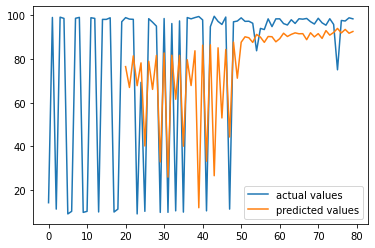

In [18]:
plt.plot(LeASLNet_optim.values, label = 'actual values')
plt.plot(LeASLNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

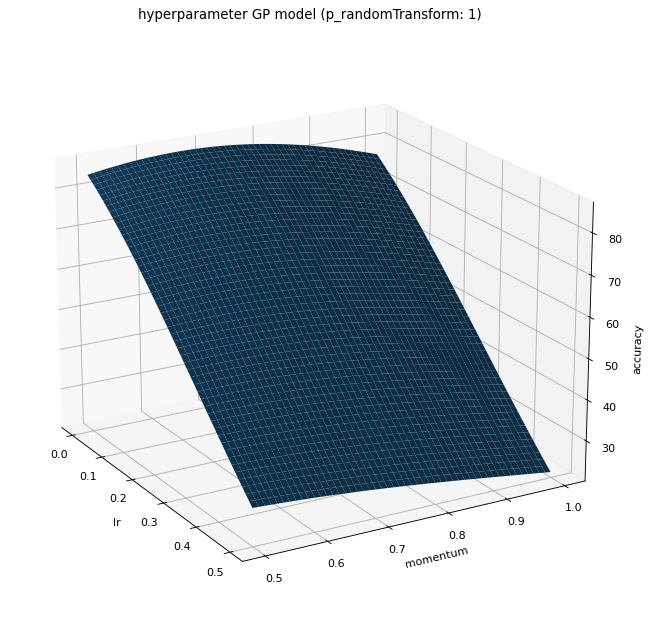

In [19]:
plot_GPmodel(LeASLNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

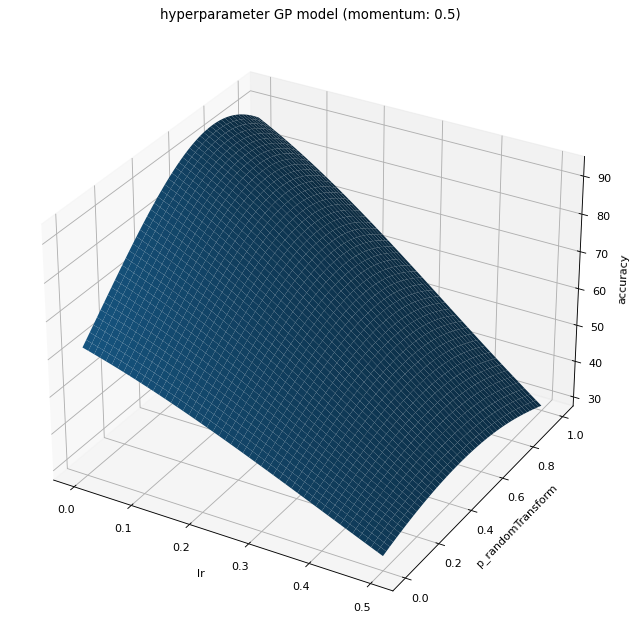

In [20]:
plot_GPmodel(LeASLNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

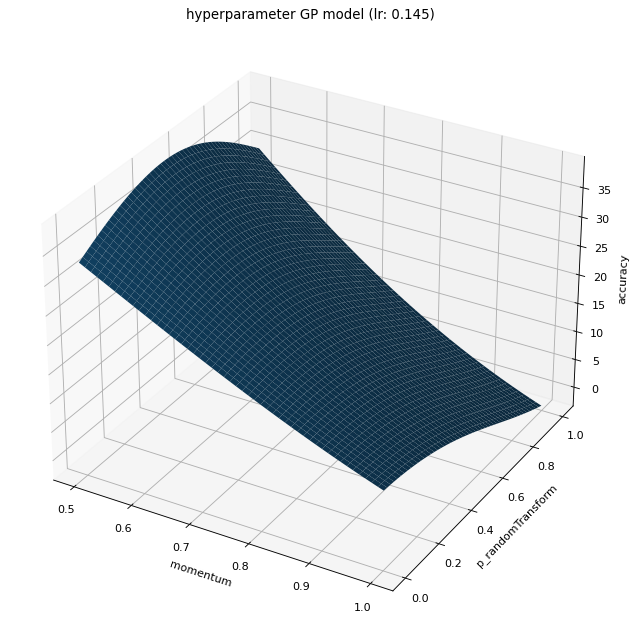

In [21]:
plot_GPmodel(LeASLNet_optim, "momentum", "p_randomTransform", "lr", 0.145)

## MNIST LeDepthNet

In [ ]:
from Models import LeDepthNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadMNIST(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 1, 28, 28)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeDepthNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeDepthNet_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

In [ ]:
num_samples = 20
num_iterations = 60

LeDepthNet_optim.get_sobol_samples(num_samples)
LeDepthNet_optim.GPR_optim(num_iterations)

In [ ]:
with open('models/LeNet/LeDepthNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeDepthNet_optim, file)

In [ ]:
with open('models/LeNet/LeDepthNet_optimizer.pkl', 'rb') as file:
    LeDepthNet_optim = pickle.load(file)

In [ ]:
LeDepthNet_optim.get_best_parameters()

In [ ]:
print(LeDepthNet_optim.values)
print(LeDepthNet_optim.points)
print(LeDepthNet_optim.gp_predictions)

In [ ]:
plt.plot(LeDepthNet_optim.values, label = 'actual values')
plt.plot(LeDepthNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

In [ ]:
plot_GPmodel(LeDepthNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

In [ ]:
plot_GPmodel(LeDepthNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

In [ ]:
plot_GPmodel(LeDepthNet_optim, "momentum", "p_randomTransform", "lr", 0.145)

## CIFAR10 LeNet

In [22]:
from Models import LeNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadCIFAR10(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 3, 32, 32)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeNet_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
num_samples = 20
num_iterations = 60

LeNet_optim.get_sobol_samples(num_samples)
LeNet_optim.GPR_optim(num_iterations)

In [24]:
with open('models/LeNet_Cifar/LeNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeNet_optim, file)

In [25]:
with open('models/LeNet_Cifar/LeNet_optimizer.pkl', 'rb') as file:
    LeNet_optim = pickle.load(file)

In [26]:
print(LeNet_optim.get_best_parameters())

({'lr': 0.09375, 'momentum': 0.65625, 'p_randomTransform': 0.3125}, 69.994)


In [27]:
print(LeNet_optim.values)
print(LeNet_optim.points)
print(LeNet_optim.gp_predictions)

[[ 8.97 ]
 [60.748]
 [58.08 ]
 [60.16 ]
 [61.412]
 [10.   ]
 [65.124]
 [63.178]
 [69.994]
 [10.   ]
 [57.726]
 [65.536]
 [64.162]
 [32.38 ]
 [59.59 ]
 [57.248]
 [69.69 ]
 [10.   ]
 [58.522]
 [53.586]
 [65.536]
 [34.334]
 [67.88 ]
 [69.396]
 [66.932]
 [60.534]
 [65.428]
 [47.456]
 [64.586]
 [59.6  ]
 [63.676]
 [10.   ]
 [61.344]
 [55.772]
 [67.54 ]
 [58.38 ]
 [67.692]
 [10.   ]
 [66.314]
 [45.978]
 [68.23 ]
 [57.708]
 [66.558]
 [34.652]
 [66.946]
 [10.   ]
 [62.162]
 [60.318]
 [54.95 ]
 [32.632]
 [63.906]
 [68.26 ]
 [51.57 ]
 [68.388]
 [64.18 ]
 [66.9  ]
 [66.346]
 [67.982]
 [53.844]
 [65.732]
 [67.52 ]
 [67.664]
 [66.392]
 [67.63 ]
 [67.148]
 [62.876]
 [65.788]
 [68.2  ]
 [66.714]
 [69.52 ]
 [64.282]
 [67.698]
 [66.21 ]
 [66.214]
 [68.464]
 [60.71 ]
 [67.426]
 [66.558]
 [69.654]
 [66.592]]
[[0.         0.5        0.        ]
 [0.25       0.75       0.5       ]
 [0.375      0.625      0.75      ]
 [0.125      0.875      0.25      ]
 [0.1875     0.6875     0.625     ]
 [0.4375     0.9375

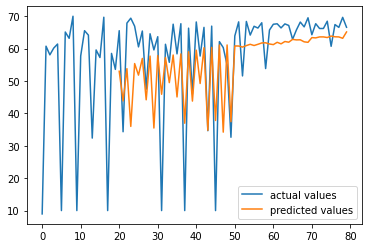

In [28]:
plt.plot(LeNet_optim.values, label = 'actual values')
plt.plot(LeNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

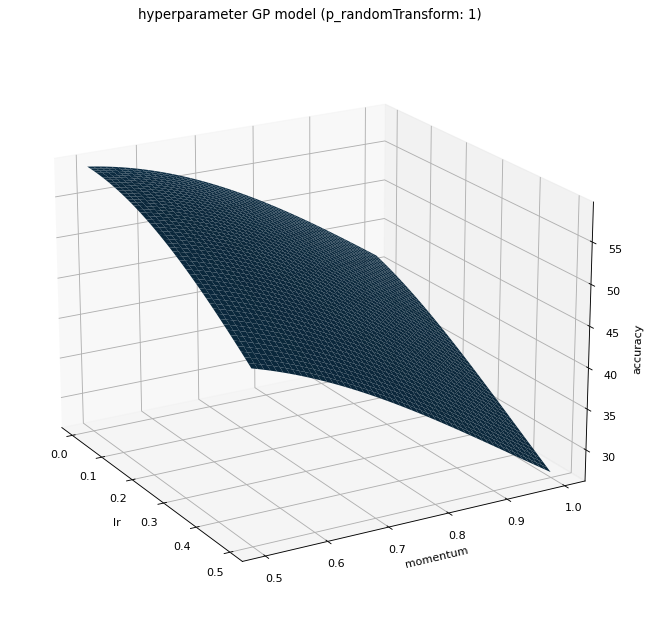

In [29]:
plot_GPmodel(LeNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

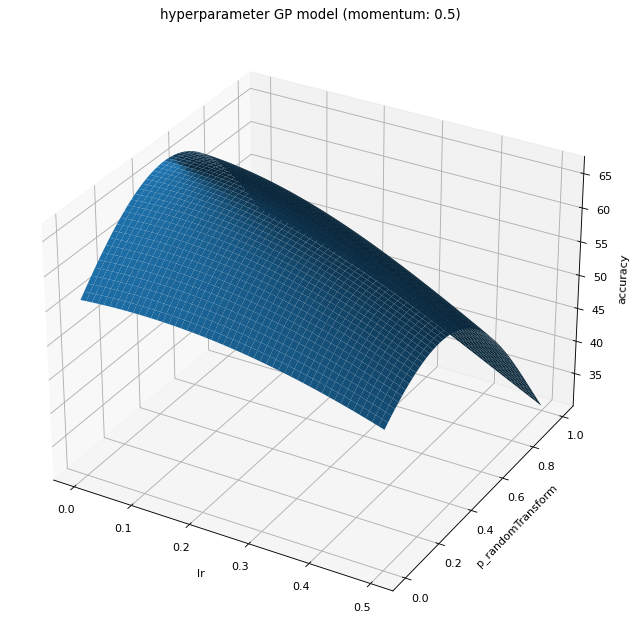

In [30]:
plot_GPmodel(LeNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

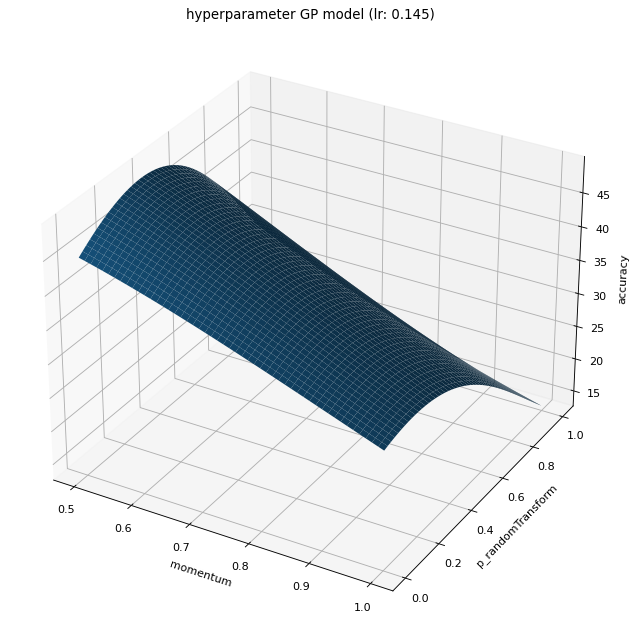

In [31]:
plot_GPmodel(LeNet_optim, "momentum", "p_randomTransform", "lr", 0.145)

## CIFAR10 LeASLNet

In [32]:
from Models import LeASLNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadCIFAR10(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def ASL_train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 3, 32, 32)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeASLNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0, device=device, expansion_rate=1).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeASLNet_optim = HyperparamOptimizer(
    train_function=ASL_train_function, parameter_range=parameter_range, device=device)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
num_samples = 20
num_iterations = 60

LeASLNet_optim.get_sobol_samples(num_samples)
LeASLNet_optim.GPR_optim(num_iterations)

In [34]:
with open('models/LeNet_Cifar/LeASLNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeASLNet_optim, file)

In [35]:
with open('models/LeNet_Cifar/LeASLNet_optimizer.pkl', 'rb') as file:
    LeASLNet_optim = pickle.load(file)

In [36]:
print(LeASLNet_optim.get_best_parameters())

({'lr': 0.026123046875, 'momentum': 0.928466796875, 'p_randomTransform': 0.00634765625}, 70.484)


In [37]:
print(LeASLNet_optim.values)
print(LeASLNet_optim.points)
print(LeASLNet_optim.gp_predictions)

[[11.9  ]
 [54.524]
 [54.156]
 [56.11 ]
 [63.954]
 [10.   ]
 [55.696]
 [64.138]
 [69.916]
 [10.   ]
 [51.5  ]
 [54.472]
 [61.33 ]
 [10.   ]
 [54.844]
 [52.908]
 [65.23 ]
 [10.   ]
 [50.082]
 [48.024]
 [65.052]
 [53.892]
 [60.876]
 [10.   ]
 [64.69 ]
 [10.   ]
 [62.562]
 [70.484]
 [60.28 ]
 [53.604]
 [60.614]
 [10.   ]
 [63.846]
 [10.   ]
 [65.378]
 [10.   ]
 [60.092]
 [43.46 ]
 [58.932]
 [10.   ]
 [63.406]
 [10.   ]
 [59.042]
 [55.39 ]
 [59.464]
 [10.   ]
 [46.58 ]
 [48.774]
 [63.464]
 [55.078]
 [66.718]
 [57.392]
 [64.258]
 [63.478]
 [46.69 ]
 [62.954]
 [63.374]
 [51.058]
 [60.386]
 [62.386]
 [64.166]
 [62.46 ]
 [66.186]
 [63.132]
 [61.67 ]
 [56.624]
 [59.764]
 [50.782]
 [52.042]
 [65.222]
 [65.466]
 [62.498]
 [64.646]
 [57.234]
 [67.124]
 [62.076]
 [53.012]
 [59.376]
 [60.196]
 [67.734]]
[[0.         0.5        0.        ]
 [0.25       0.75       0.5       ]
 [0.375      0.625      0.75      ]
 [0.125      0.875      0.25      ]
 [0.1875     0.6875     0.625     ]
 [0.4375     0.9375

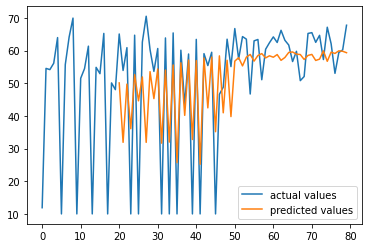

In [38]:
plt.plot(LeASLNet_optim.values, label = 'actual values')
plt.plot(LeASLNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

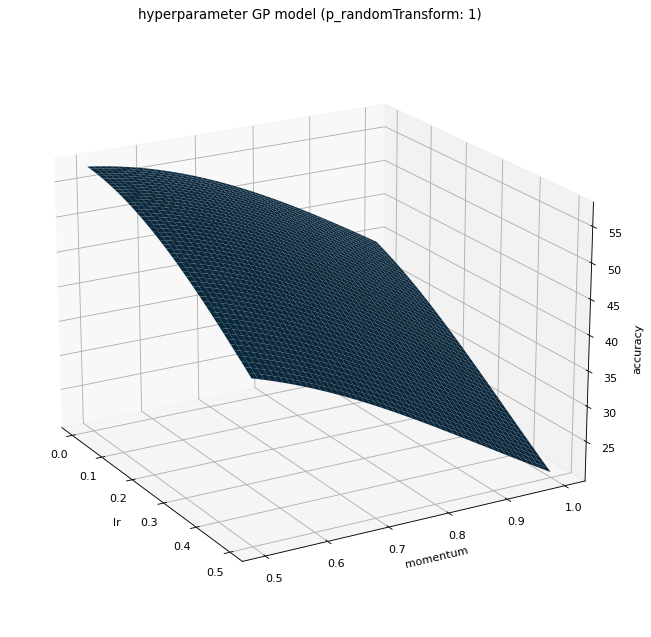

In [39]:
plot_GPmodel(LeASLNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

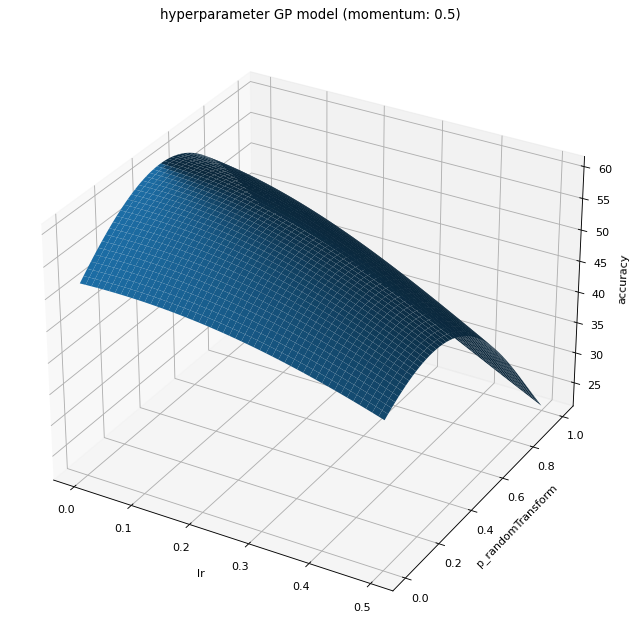

In [40]:
plot_GPmodel(LeASLNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

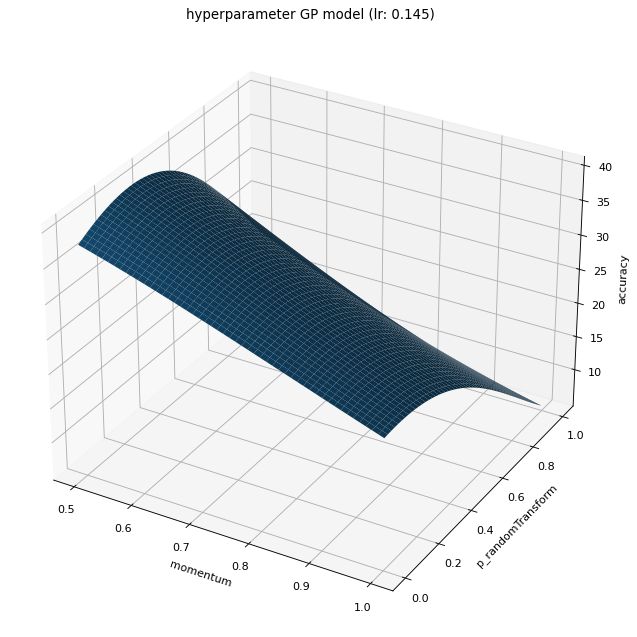

In [41]:
plot_GPmodel(LeASLNet_optim, "momentum", "p_randomTransform", "lr", 0.145)

## CIFAR10 LeDepthNet

In [ ]:
from Models import LeDepthNet

batch_size = 100
train_dataset, train_dataloader, test_dataset, test_dataloader, classes = loadCIFAR10(batch_size)

parameter_range = {"lr": [0.0, 0.5], "momentum": [0.5, 1], "p_randomTransform": [0, 1]}

def train_function(parameters, device):
    epochs = 10
    input_shape = (batch_size, 3, 32, 32)
    num_labels = 10
    criterion = CrossEntropyLoss()

    model = LeDepthNet(input_shape, num_labels,
                  initial_lr=parameters["lr"], momentum=parameters["momentum"], weight_decay=0).to(device)
    train_NN(model, criterion, train_dataloader,
             test_dataloader, epochs=epochs, batches_to_test=1000, patience=2, device=device,
             print_test=False, verbose=False, p_randomTransform=parameters["p_randomTransform"])
    return test_loss(model, train_dataloader, criterion, device)[1]


LeDepthNet_optim = HyperparamOptimizer(
    train_function=train_function, parameter_range=parameter_range, device=device)

In [ ]:
num_samples = 20
num_iterations = 60

LeDepthNet_optim.get_sobol_samples(num_samples)
LeDepthNet_optim.GPR_optim(num_iterations)

In [ ]:
with open('models/LeNet_Cifar/LeDepthNet_optimizer.pkl', 'wb') as file:
    pickle.dump(LeDepthNet_optim, file)

In [ ]:
with open('models/LeNet_Cifar/LeDepthNet_optimizer.pkl', 'rb') as file:
    LeDepthNet_optim = pickle.load(file)

In [ ]:
LeDepthNet_optim.get_best_parameters()

In [ ]:
print(LeDepthNet_optim.values)
print(LeDepthNet_optim.points)
print(LeDepthNet_optim.gp_predictions)

In [ ]:
plt.plot(LeDepthNet_optim.values, label = 'actual values')
plt.plot(LeDepthNet_optim.gp_predictions, label = 'predicted values')
plt.legend()
plt.show()

In [ ]:
plot_GPmodel(LeDepthNet_optim, "lr", "momentum", "p_randomTransform", 1, azim=-30, elevation=20)

In [ ]:
plot_GPmodel(LeDepthNet_optim, "lr", "p_randomTransform", "momentum", 0.5)

In [ ]:
plot_GPmodel(LeDepthNet_optim, "momentum", "p_randomTransform", "lr", 0.145)